In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

from mlxtend.plotting import plot_decision_regions

# Co to jest SVM (Support Vector Machine)?


SVM, czyli Maszyna Wektorów Nośnych, to jeden z popularniejszych algorytmów używanych w Machine Learning do zadań klasyfikacji. SVM próbuje znaleźć prostą (np. linię lub płaszczyznę) w przestrzeni danych, która najlepiej rozdziela dwie klasy (czyli różne grupy danych).

Parametr C jest bardzo istotny w SVM. Reguluje, jak bardzo model ma się dostosowywać do danych treningowych. Niskie wartości C oznaczają, że model dopuszcza więcej błędów, ale może lepiej uogólniać dane, natomiast wysokie wartości C sprawiają, że model bardziej skupia się na poprawnej klasyfikacji przykładów treningowych, nawet kosztem ogólności.

# Linear SVM Classification

## Generowanie danych
W pierwszej części notebooka generujemy dane przy użyciu funkcji make_moons. Dane te tworzą dwie klasy w *kształcie półksiężyców*. Na wykresie poniżej widać te dane – każda kropka reprezentuje jeden przykład, a różne kolory odpowiadają różnym klasom.

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.1, random_state=42)

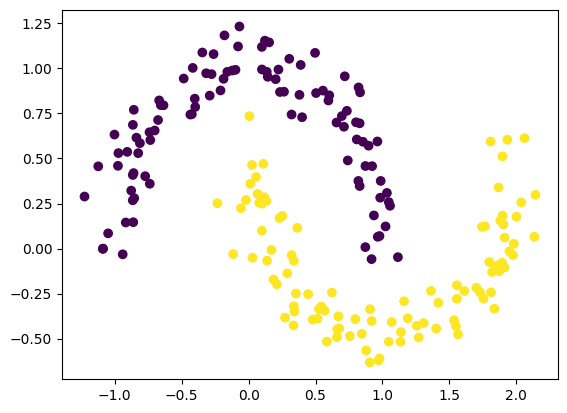

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Zad.

Naucz liniwy  model SVM 

* C = 0.0001
* C = 0.001
* C = 0.01
* C = 0.1
* C = 1.
* C = 10.
* C = 100.

Wykonaj wykres ilustrujący wyniki.

## Trening modelu liniowego SVC
Teraz przechodzimy do nauki modelu liniowego SVM, który próbuje znaleźć prostą linię oddzielającą te dwie klasy. Model ten ma parametr C, który zmienimy, aby zobaczyć, jak wpływa na wyniki.

`C = 0.0001`: Bardzo niski poziom dokładności – model nie stara się zbytnio dopasować do danych.

`C = 100`: Model stara się maksymalnie dopasować do danych, co może prowadzić do nadmiernego dopasowania (ang. **overfitting**).

Poniżej jest kod, który uczy model dla różnych wartości C i wykreśla decyzje modelu na wykresie.

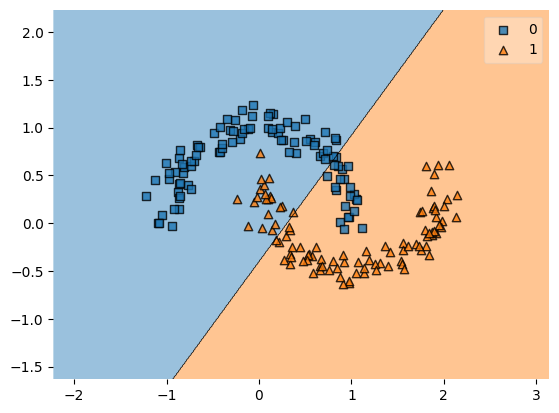

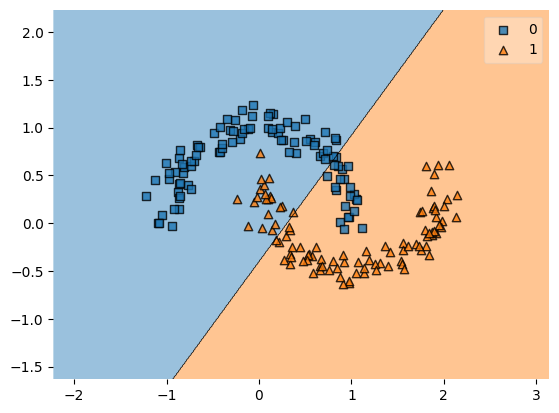

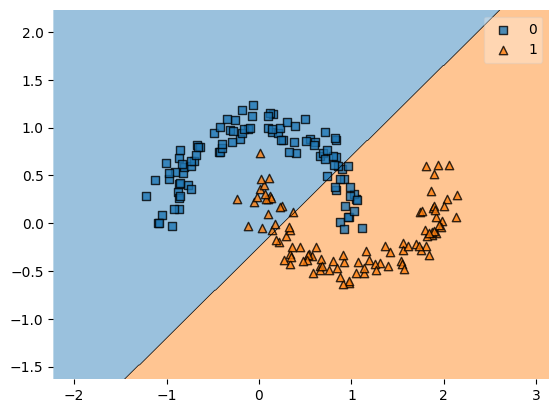

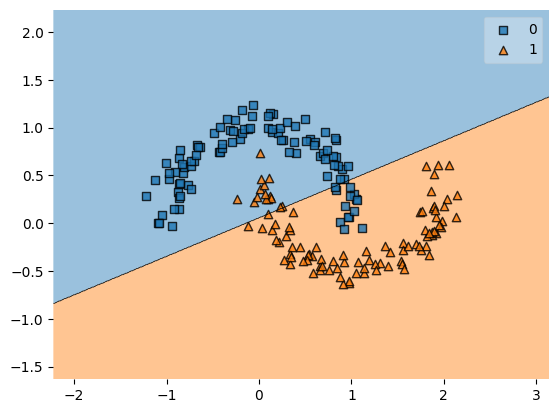

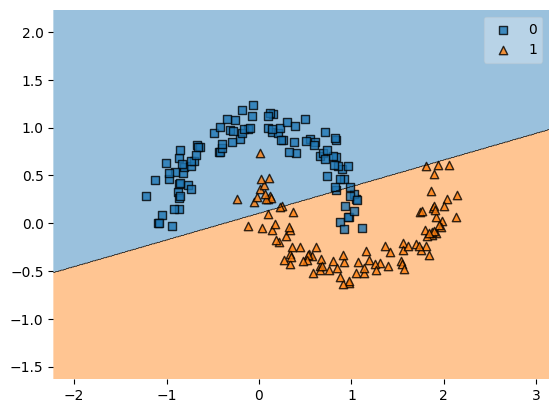

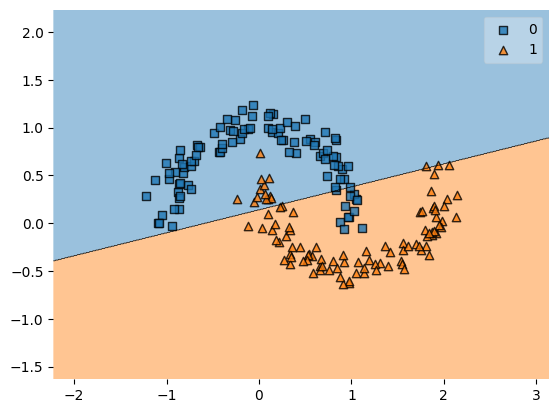

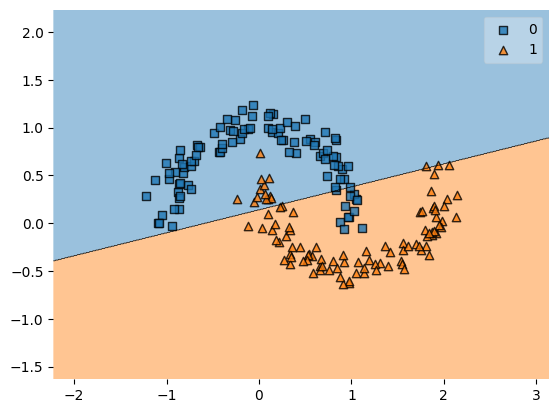

In [6]:
from sklearn.svm import SVC

c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for current_c in c_vals:
    svc = SVC(kernel="linear", C=current_c)
    svc.fit(X, y)
    plot_decision_regions(X,y,svc)
    plt.show()

## Trening i testowanie modelu
Teraz podzielimy dane na zbiór treningowy (używany do nauki modelu) i testowy (do sprawdzenia, jak model działa na nowych danych). Następnie wytrenujemy model z **C = 100** i sprawdzimy, jak dobrze klasyfikuje nowe dane.

In [32]:
from sklearn.model_selection import train_test_split

current_c = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7777)
svc = SVC(kernel="linear", C=current_c)
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)

print(f"{svc} classification test score: {svc_score}")

SVC(C=100, kernel='linear') classification test score: 0.83


Wartość score to dokładność modelu – im wyższa, tym lepiej model sobie radzi. Ale uwaga, bardzo wysokie wyniki mogą oznaczać, że model zbyt mocno dopasował się do danych treningowych i nie będzie dobrze działał na nowych przykładach.